In [1]:
%matplotlib inline
import pandas as pd
data = pd.read_csv(r'C:\Data\DeepLearningWorkshop\xOSI_feats.csv')

In [2]:
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [3]:
data['Weekend'].value_counts()

False    9462
True     2868
Name: Weekend, dtype: int64

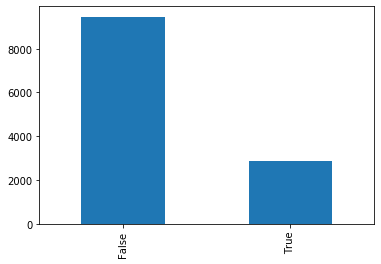

In [4]:
data['Weekend'].value_counts().plot(kind='bar')

In [5]:
data['is_weekend'] = data['Weekend'].apply(lambda \
                     row: 1 if row == True else 0)

In [6]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,is_weekend
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,1


In [7]:
data.drop('Weekend', axis=1, inplace=True)

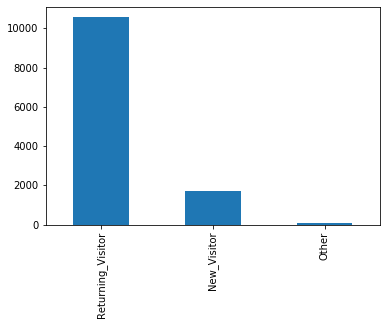

In [8]:
data['VisitorType'].value_counts()
data['VisitorType'].value_counts().plot(kind='bar')

In [9]:
colname = 'VisitorType'
visitor_type_dummies = pd.get_dummies(data[colname], \
                                      prefix=colname)
pd.concat([data[colname], \
           visitor_type_dummies], axis=1).tail(n=10)

,VisitorType,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
12320,Returning_Visitor,0,0,1
12321,Returning_Visitor,0,0,1
12322,Returning_Visitor,0,0,1
12323,Returning_Visitor,0,0,1
12324,Returning_Visitor,0,0,1
12325,Returning_Visitor,0,0,1
12326,Returning_Visitor,0,0,1
12327,Returning_Visitor,0,0,1
12328,Returning_Visitor,0,0,1
12329,New_Visitor,1,0,0


In [10]:
visitor_type_dummies.drop('VisitorType_Other', \
                          axis=1, inplace=True)
visitor_type_dummies.head()

,VisitorType_New_Visitor,VisitorType_Returning_Visitor
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [11]:
data = pd.concat([data, visitor_type_dummies], axis=1)
data.drop('VisitorType', axis=1, inplace=True) 

In [12]:
colname = 'Month'
month_dummies = pd.get_dummies(data[colname], prefix=colname)
month_dummies.drop(colname+'_Feb', axis=1, inplace=True)
data = pd.concat([data, month_dummies], axis=1)
data.drop('Month', axis=1, inplace=True) 

In [13]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,VisitorType_Returning_Visitor,Month_Aug,Month_Dec,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0


In [15]:
data.dtypes

Administrative                     int64
Administrative_Duration          float64
Informational                      int64
Informational_Duration           float64
ProductRelated                     int64
ProductRelated_Duration          float64
BounceRates                      float64
ExitRates                        float64
PageValues                       float64
SpecialDay                       float64
OperatingSystems                   int64
Browser                            int64
Region                             int64
TrafficType                        int64
is_weekend                         int64
VisitorType_New_Visitor            uint8
VisitorType_Returning_Visitor      uint8
Month_Aug                          uint8
Month_Dec                          uint8
Month_Jul                          uint8
Month_June                         uint8
Month_Mar                          uint8
Month_May                          uint8
Month_Nov                          uint8
Month_Oct       

In [16]:
data.to_csv(r'C:\Data\DeepLearningWorkshop\xOSI_feats_e2.csv', index=False)
target = pd.read_csv(r'C:\Data\DeepLearningWorkshop\xOSI_target.csv')
target.head(n=10)

,Revenue
0,False
1,False
2,False
3,False
4,False
5,False
6,False
7,False
8,False
9,False


In [17]:
target['Revenue'] = target['Revenue'].apply(lambda row: 1 \
                    if row==True else 0)
target.head(n=10)

,Revenue
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [18]:
target.to_csv(r'C:\Data\DeepLearningWorkshop\xOSI_target_e2.csv', index=False)